In [1]:
%pylab inline
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns',None)

Populating the interactive namespace from numpy and matplotlib


In [88]:
data = pd.read_csv('acc_nonorm_touse_new.csv')
target = pd.read_csv('target_touse.csv')

In [89]:
# fico range between low and high is on average 4 points apart, so we can take the average between the two and use a single feature instead
data['fico_score'] = 0.5*data['fico_range_low'] + 0.5*data['fico_range_high']
data['sec_app_fico_score'] = 0.5*data['sec_app_fico_range_low'] + 0.5*data['sec_app_fico_range_high']

# ratios for income against installment
data['ratio_inc_install'] = data['annual_inc'] / data['installment']
data['ratio_adjinc_install'] = data['annual_inc_reduced'] / data['installment']
data['ratio_incjoint_install'] = data['annual_inc_joint']/ data['installment']
data['ratio_adjincjoint_install'] = data['annual_inc_joint_reduced']/data['installment']

In [90]:
data.shape

(269360, 190)

In [98]:
df = []
df = data[['loan_amnt','int_rate','term_ 60 months','installment','grade','grouped_subgrade_12_345','emp_length','annual_inc','verification_status', 'dti',\
           'dti_joint','delinq_2yrs','fico_score','open_acc','duration_of_credit_months','sec_app_fico_score','application_type','annual_inc_joint','delinq_amnt',\
          'acc_open_past_24mths','acc_now_delinq','avg_cur_bal','initial_list_status_w','revol_bal','il_util','ratio_inc_loan','ratio_redinc_funded',\
          'max_bal_bc']]

In [99]:
cols_w_purpose = [col for col in data.columns if col.startswith('purpose')]
cols_w_verification = [col for col in data.columns if col.startswith('verification_status')]
cols_w_homeownership = [col for col in data.columns if col.startswith('home_ownership')]

In [100]:
df = pd.concat([df,data[cols_w_purpose]],axis=1)
df = pd.concat([df,data[cols_w_verification]],axis=1)
df = pd.concat([df,data[cols_w_homeownership]],axis=1)
df.shape

(269360, 48)

In [54]:
data.application_type.value_counts()

1    263745
2      5615
Name: application_type, dtype: int64

In [56]:
data.loc[data.application_type==2]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,grouped_grade_NO_EG,grouped_subgrade_12_345,grouped_subgrade_123_45,grouped_subgrade,duration_of_credit_months,annual_inc_reduced,annual_inc_joint_reduced,sec_app_duration_of_credit_months,ratio_inc_loan,ratio_redinc_loan,ratio_inc_funded,ratio_redinc_funded,ratio_incjoint_loan,ratio_redincjoint_loan,ratio_incjoint_funded,ratio_redincjoint_funded,loan_minus_funded,ratio_loan_funded,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
47,25000.0,25000.0,25000.0,13.06,843.08,3,11,10.0,90000.00,1,22.90,1.0,730.0,734.0,0.0,22.0,10000.0,12.0,0.0,13897.0,29.4,27.0,0.0,10000.0,1.0,2,180000.00,27.92,1,0.0,0.0,296320.0,2.0,2.0,2.0,4.0,3.0,67772.0,97.0,0.0,4.0,0.0,56.0,47300.0,3.0,7.0,5.0,10.0,29632.0,12800.0,0.0,0.0,0.0,117.0,177.0,18.0,3.0,1.0,18.0,10000.0,6.0,22.0,0.0,0.0,1.0,4.0,6.0,13.0,8.0,12.0,1.0,12.0,0.0,0.0,0.0,4.0,96.3,0.0,0.0,0.0,337529.0,82382.0,12800.0,70315.0,79482.0,610.0,614.0,1.0,2.0,4.0,82.1,1.0,9.0,0.0,0.0,23.0,3,5,5,11,177.0,90000.00,180000.00,147.0,3.600000,3.600000,3.600000,3.600000,7.200000,7.200000,7.200000,7.200000,0.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
64,15000.0,15000.0,15000.0,9.44,480.08,2,6,10.0,120000.00,0,5.32,3.0,680.0,684.0,0.0,14.0,10000.0,7.0,0.0,22068.0,81.4,26.0,0.0,14.0,1.0,2,228000.00,7.20,0,0.0,0.0,292677.0,1.0,1.0,1.0,1.0,8.0,2384.0,94.0,1.0,1.0,1784

In [101]:
data.loc[data.application_type==2]['sec_app_fico_range_low'].value_counts()
#only 20% of the joint applications provide information on secondary applicant

-1.0      1541
 665.0     228
 650.0     222
 660.0     208
 655.0     206
 670.0     200
 645.0     196
 675.0     187
 690.0     177
 680.0     172
 640.0     169
 630.0     150
 685.0     139
 635.0     136
 695.0     134
 620.0     113
 700.0     101
 625.0      97
 705.0      86
 615.0      83
 710.0      81
 610.0      67
 605.0      62
 715.0      58
 600.0      57
 595.0      54
 720.0      49
 725.0      49
 590.0      46
 585.0      45
 580.0      37
 570.0      37
 730.0      35
 565.0      33
 540.0      33
 575.0      32
 555.0      31
 550.0      31
 735.0      28
 740.0      26
 745.0      24
 560.0      21
 755.0      19
 750.0      19
 545.0      15
 765.0      12
 775.0      11
 780.0      11
 760.0      10
 785.0       6
 790.0       6
 770.0       5
 800.0       5
 805.0       3
 815.0       3
 830.0       3
 795.0       3
 810.0       2
 820.0       1
Name: sec_app_fico_range_low, dtype: int64

In [103]:
df = pd.concat([df,target],axis=1)

## beginning of ML

In [104]:
y = df.loan_status_binary
x = df.drop('loan_status_binary',axis=1)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### random forest

In [106]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
train_error = 1 - rf.score(X_train, y_train)
test_error  = 1 - rf.score(X_test, y_test)
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.00000
The test     error is: 0.34710


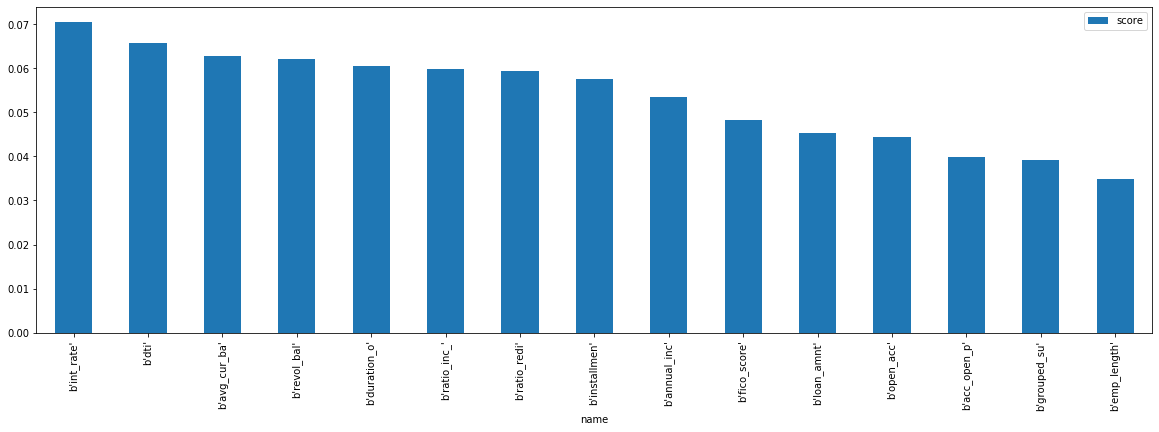

In [109]:
feature_importance = list(zip(X_train.columns[:-2], rf.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score',figsize=(20,6))

In [114]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, rf.predict(X_test))
matrix

array([[17353,  9617],
       [ 9082, 17820]])

In [118]:
(matrix[0,1] + matrix[1,0]) / sum(matrix)

0.3471005346005346

### gradient boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [123]:
train_error = 1 - gbm.score(X_train, y_train)
test_error  = 1 - gbm.score(X_test, y_test)
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.33771
The test     error is: 0.33791


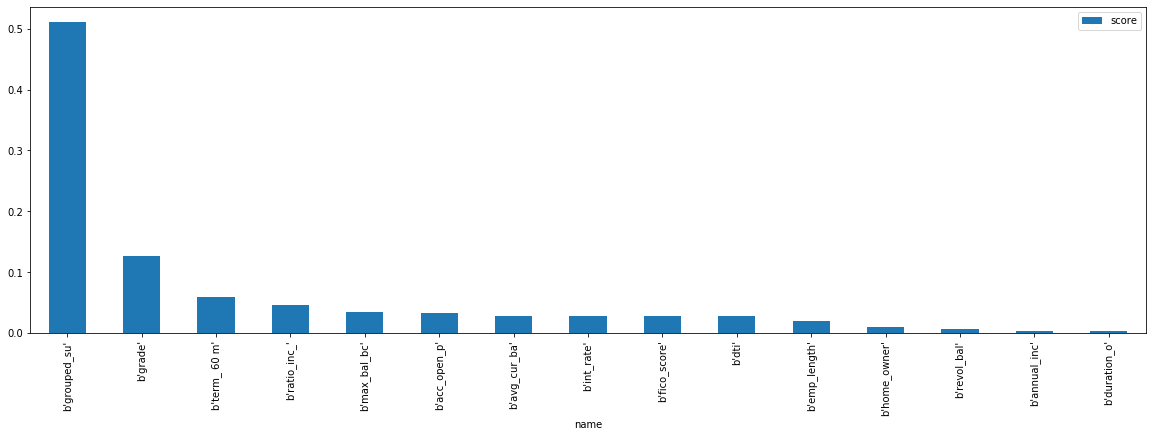

In [124]:
feature_importance = list(zip(X_train.columns[:-2], gbm.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score',figsize=(20,6))